# Virtual experiments, replicating Lahiri and Bevan 2020

In this notebook, we try and replicate a few of the dopamine experiments in Lahiri and Bevan 2020.

4Hz optogenetical stimulation (5 pulses) yielded approximately 0.3 uM DA concentration, while 20Hz stimulation yielded (5 pulses) on average 0.5 uM DA concentration. Here we model the optogenetic activation by setting the DA concentration to these values. In both cases the duration of the resulting DA pulse was set to 5 seconds. 


## Experiment 1

Current injection driving the dSPN to approximately 10Hz, after 5 seconds 0.3 uM DA is added, then current injection is active for another 5 seconds.

Compare to Figure 1E, 1G, 1H

In [1]:
import os
from snudda import Snudda

neuron = "dspn"
# neuron = "ispn"

neuron_path = os.path.join("..", "..", "snudda_data", "neurons", "striatum", neuron)
network_path = os.path.join("networks", "bevan_fig1g_bath_current_short")

In [2]:
snudda = Snudda(network_path=network_path)
si = snudda.init_tiny(neuron_paths=neuron_path, neuron_names=neuron, number_of_neurons=[5], 
                      random_seed=1234)

si.network_data["regions"]["Cube"]["neurons"]["dspn"]["reaction_diffusion"] = "../../data/JSON/reaction_diffusion_D1_from_SBTab.json"
# si.network_data["regions"]["Cube"]["neurons"]["ispn"]["reaction_diffusion"] = "data/JSON/reaction_diffusion_D2.json-updated"


# How the ion channels are modified by DA
# OBS, we include SK direkt modulation, in relality it should be modulated by DA acting on Ca 
# si.network_data["regions"]["Cube"]["neurons"][neuron]["modulation"] = "modulation_parameters.json"
si.network_data["regions"]["Cube"]["neurons"][neuron]["modulation"] = "../../data/JSON/modulation_parameters-v2.json"

si.network_data["regions"]["Cube"]["neurons"][neuron]["modulation_key"] = "abc"

si.write_json()

snudda.create_network()

Warning, no snudda_data set!
Adding neurons: dspn from dir ../../snudda_data/neurons/striatum/dspn
Writing networks/bevan_fig1g_bath_current_short/network-config.json
Writing networks/bevan_fig1g_bath_current_short/network-config.json
Placing neurons
Network path: networks/bevan_fig1g_bath_current_short
Creating missing directory networks/bevan_fig1g_bath_current_short/log
Created directory networks/bevan_fig1g_bath_current_short/log
Reading SNUDDA_DATA=None from networks/bevan_fig1g_bath_current_short/network-config.json
No n_putative_points and putative_density, setting n_putative_points = 102
(this must be larger than the number of neurons you want to place)
Generating 102 points for networks/bevan_fig1g_bath_current_short/mesh/Cube-cube-mesh-3.9602691983237216e-05.obj
Filtering, keeping inside points: 8 / 44
neuron_name = 'dspn_0', num = np.int64(1), neuron_path = '../../snudda_data/neurons/striatum/dspn/str-dspn-e150602_c1_D1-mWT-0728MSN01-v20220620'
neuron_name = 'dspn_1', num = 

In [2]:
# Free memory
snudda = None

mech_dir = "/home/hjorth/HBP/BasalGangliaData/data/neurons/mechanisms"
sample_dt = None # 0.00005

sim_config_on4 = os.path.join("..", "..", "data", "JSON", "bevan_fig1g_with_DA_4Hz_stim_short.json")
sim_config_on20 = os.path.join("..", "..", "data", "JSON", "bevan_fig1g_with_DA_20Hz_stim_short.json")

sim_config_off = os.path.join("..", "..", "data", "JSON", "bevan_fig1g_no_DA_short.json")

sim_output_neuromodulation_ON4 = os.path.join(network_path, "simulation", "output_neuromodulation_ON_4Hz.hdf5")
sim_output_neuromodulation_ON20 = os.path.join(network_path, "simulation", "output_neuromodulation_ON_20Hz.hdf5")

sim_output_neuromodulation_OFF = os.path.join(network_path, "simulation", "output_neuromodulation_OFF.hdf5")

sim_time = 2.2
n_workers = 5

In [ ]:
!nrnivmodl ../../snudda_data/neurons/mechanisms/

Please run the following 3 lines in a terminal

In [4]:
# sim_time=0.1  # TEMP to test!
run_str_on4 = f"mpirun -n {n_workers} snudda simulate {network_path} --time {sim_time} --simulation_config {sim_config_on4} --mechdir {mech_dir} --enable_rxd_neuromodulation"
print(run_str_on4)
run_str_on20 = f"mpirun -n {n_workers} snudda simulate {network_path} --time {sim_time} --simulation_config {sim_config_on20} --mechdir {mech_dir} --enable_rxd_neuromodulation"
print(run_str_on20)
run_str_off = f"mpirun -n {n_workers} snudda simulate {network_path} --time {sim_time} --simulation_config {sim_config_off} --mechdir {mech_dir} "
print(run_str_off)

mpirun -n 5 snudda simulate networks/bevan_fig1g_bath_current_short --time 2.2 --simulation_config ../../data/JSON/bevan_fig1g_with_DA_4Hz_stim_short.json --mechdir /home/hjorth/HBP/BasalGangliaData/data/neurons/mechanisms --enable_rxd_neuromodulation
mpirun -n 5 snudda simulate networks/bevan_fig1g_bath_current_short --time 2.2 --simulation_config ../../data/JSON/bevan_fig1g_with_DA_20Hz_stim_short.json --mechdir /home/hjorth/HBP/BasalGangliaData/data/neurons/mechanisms --enable_rxd_neuromodulation
mpirun -n 5 snudda simulate networks/bevan_fig1g_bath_current_short --time 2.2 --simulation_config ../../data/JSON/bevan_fig1g_no_DA_short.json --mechdir /home/hjorth/HBP/BasalGangliaData/data/neurons/mechanisms 


# Disabled for now, run it in terminal!
os.system(run_str_on4)
os.system(run_str_on20)
os.system(run_str_off)

# Analysing 4Hz DA stim

In [3]:
from snudda.plotting.plot_simulation_reaction_diffusion import PlotReactionDiffusion

# By passing the sls object we avoid loading it twice
prd = PlotReactionDiffusion(network_path=network_path,
                            simulation_file=sim_output_neuromodulation_ON4)

for i in [0,1]:
    print(f"Neuron {i} has data: {prd.list_neuron_info(i)}\n\n")

Loading networks/bevan_fig1g_bath_current_short/simulation/output_neuromodulation_ON_4Hz.hdf5
Neuron 0 has data: ['AC5', 'AC5_ATP', 'AC5_Ca', 'AC5_Ca_ATP', 'AC5_Ca_GaolfGTP', 'AC5_Ca_GaolfGTP_ATP', 'AC5_GaolfGTP', 'AC5_GaolfGTP_ATP', 'AMP', 'ARPP21', 'ATP', 'B56PP2A', 'B56PP2A_D32p75', 'B56PP2A_pARPP21', 'B56PP2Ap', 'B56PP2Ap_D32p75', 'B56PP2Ap_pARPP21', 'B72PP2A', 'B72PP2A_Ca', 'B72PP2A_Ca_D32p34', 'B72PP2A_Ca_D32p75', 'B72PP2A_Ca_pARPP21', 'B72PP2A_D32p34', 'B72PP2A_D32p75', 'B72PP2A_pARPP21', 'CDK5', 'CDK5_D32', 'Ca', 'CaM', 'CaMKII', 'CaMKII_CaM', 'CaMKII_CaM_Ca2', 'CaMKII_CaM_Ca2_psd', 'CaMKII_CaM_Ca2_psd_Substrate', 'CaMKII_CaM_Ca4', 'CaMKII_CaM_Ca4_CaMKII_CaM_Ca4', 'CaMKII_CaM_Ca4_psd', 'CaMKII_CaM_Ca4_psd_CaMKII_CaM_Ca4_psd', 'CaMKII_CaM_Ca4_psd_Substrate', 'CaMKII_CaM_psd', 'CaMKII_CaM_psd_Substrate', 'CaMKII_psd', 'CaM_Ca2', 'CaM_Ca4', 'CaM_Ca4_pARPP21', 'D1R', 'D1R_DA', 'D1R_Golf', 'D1R_Golf_DA', 'D32', 'D32p34', 'D32p75', 'DA', 'GaolfGDP', 'GaolfGTP', 'Gbgolf', 'Golf', 'PDE

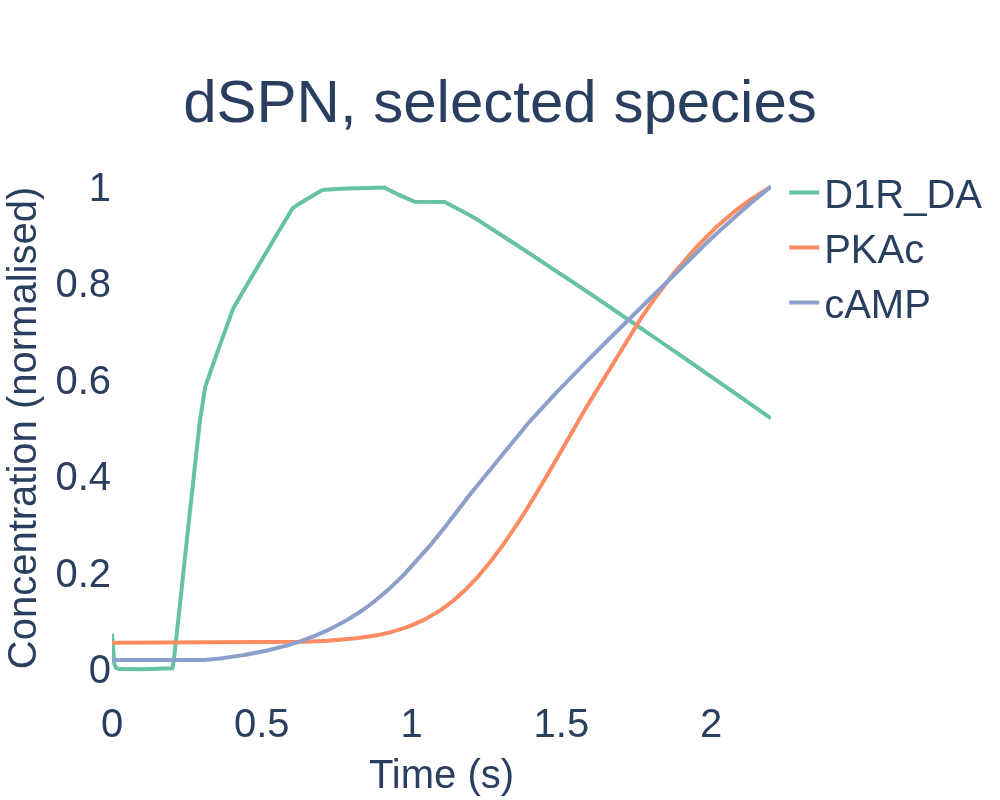

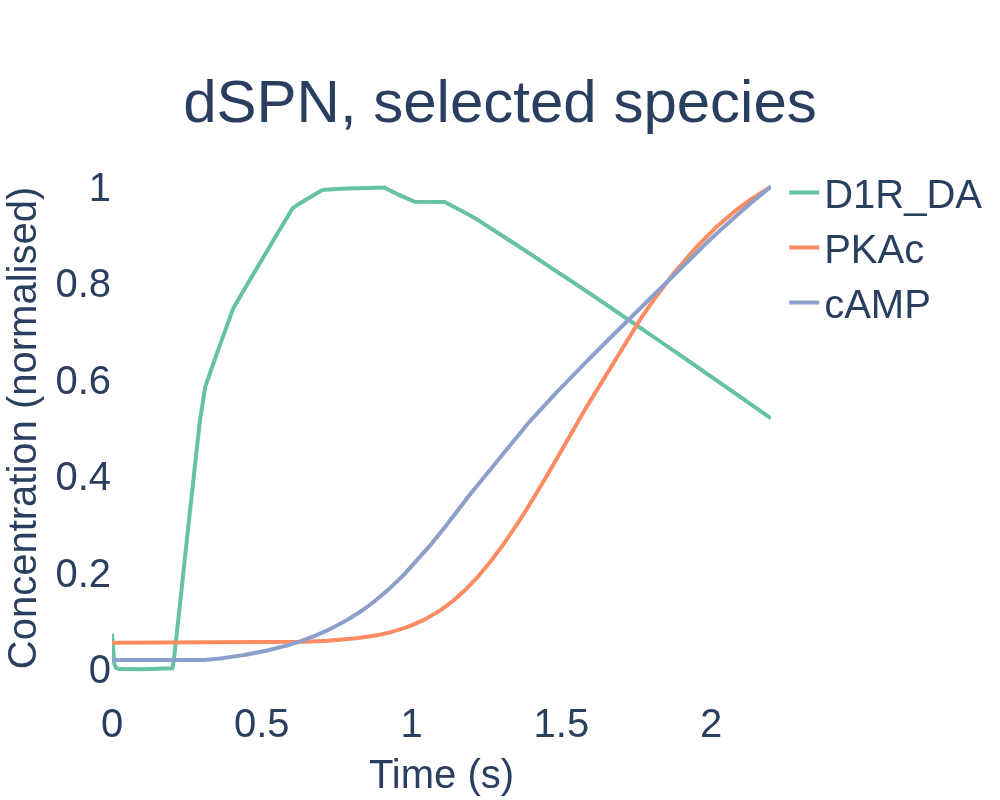

In [4]:
prd.plot(neuron_id=0, species=["D1R_DA", "PKAc", "cAMP"], fig_name="biochem-0-normalised_DA_4Hz.svg", title="dSPN, selected species", normalise=True)

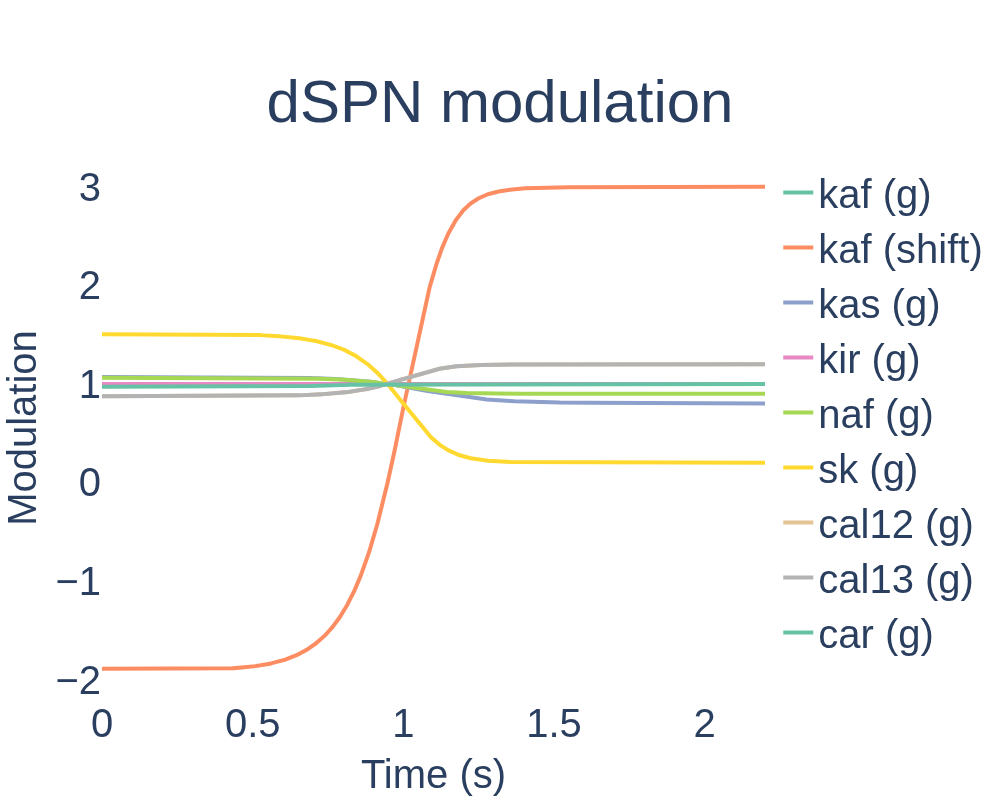

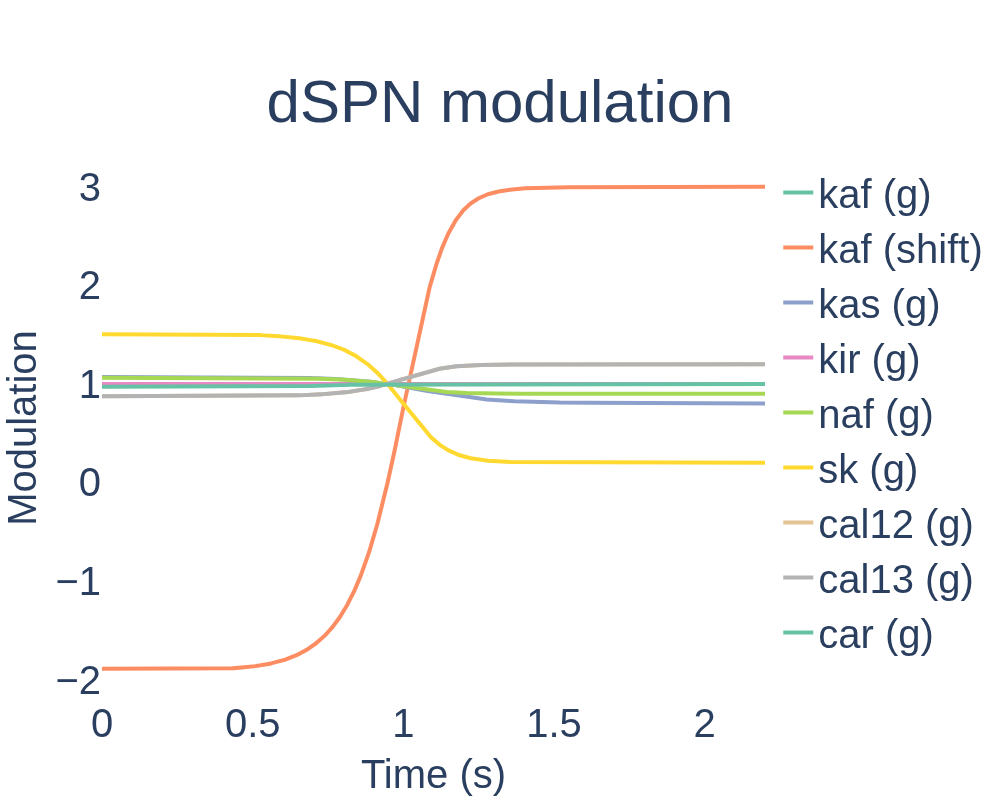

In [5]:
prd.plot(neuron_id=0, 
         species=['kaf_ms.modulation_factor_g', 'kaf_ms.modulation_factor_shift', 'kas_ms.modulation_factor', 'kir_ms.modulation_factor', 'naf_ms.modulation_factor',
                 'sk_ms.modulation_factor', 'cal12_ms.modulation_factor', 'cal13_ms.modulation_factor', 'car_ms.modulation_factor'], 
         species_label=['kaf (g)', 'kaf (shift)', 'kas (g)', 'kir (g)', 'naf (g)', 'sk (g)', 'cal12 (g)', 'cal13 (g)', 'car (g)'],
         ylabel="Modulation", fig_name="modulation-0_DA_4Hz.svg", title="dSPN modulation", width=800, height=700)

# Analysing 20Hz DA

In [6]:
from snudda.plotting.plot_simulation_reaction_diffusion import PlotReactionDiffusion

# By passing the sls object we avoid loading it twice
prd = PlotReactionDiffusion(network_path=network_path,
                            simulation_file=sim_output_neuromodulation_ON20)

for i in [0,1]:
    print(f"Neuron {i} has data: {prd.list_neuron_info(i)}\n\n")

Loading networks/bevan_fig1g_bath_current_short/simulation/output_neuromodulation_ON_20Hz.hdf5
Neuron 0 has data: ['AC5', 'AC5_ATP', 'AC5_Ca', 'AC5_Ca_ATP', 'AC5_Ca_GaolfGTP', 'AC5_Ca_GaolfGTP_ATP', 'AC5_GaolfGTP', 'AC5_GaolfGTP_ATP', 'AMP', 'ARPP21', 'ATP', 'B56PP2A', 'B56PP2A_D32p75', 'B56PP2A_pARPP21', 'B56PP2Ap', 'B56PP2Ap_D32p75', 'B56PP2Ap_pARPP21', 'B72PP2A', 'B72PP2A_Ca', 'B72PP2A_Ca_D32p34', 'B72PP2A_Ca_D32p75', 'B72PP2A_Ca_pARPP21', 'B72PP2A_D32p34', 'B72PP2A_D32p75', 'B72PP2A_pARPP21', 'CDK5', 'CDK5_D32', 'Ca', 'CaM', 'CaMKII', 'CaMKII_CaM', 'CaMKII_CaM_Ca2', 'CaMKII_CaM_Ca2_psd', 'CaMKII_CaM_Ca2_psd_Substrate', 'CaMKII_CaM_Ca4', 'CaMKII_CaM_Ca4_CaMKII_CaM_Ca4', 'CaMKII_CaM_Ca4_psd', 'CaMKII_CaM_Ca4_psd_CaMKII_CaM_Ca4_psd', 'CaMKII_CaM_Ca4_psd_Substrate', 'CaMKII_CaM_psd', 'CaMKII_CaM_psd_Substrate', 'CaMKII_psd', 'CaM_Ca2', 'CaM_Ca4', 'CaM_Ca4_pARPP21', 'D1R', 'D1R_DA', 'D1R_Golf', 'D1R_Golf_DA', 'D32', 'D32p34', 'D32p75', 'DA', 'GaolfGDP', 'GaolfGTP', 'Gbgolf', 'Golf', 'PD

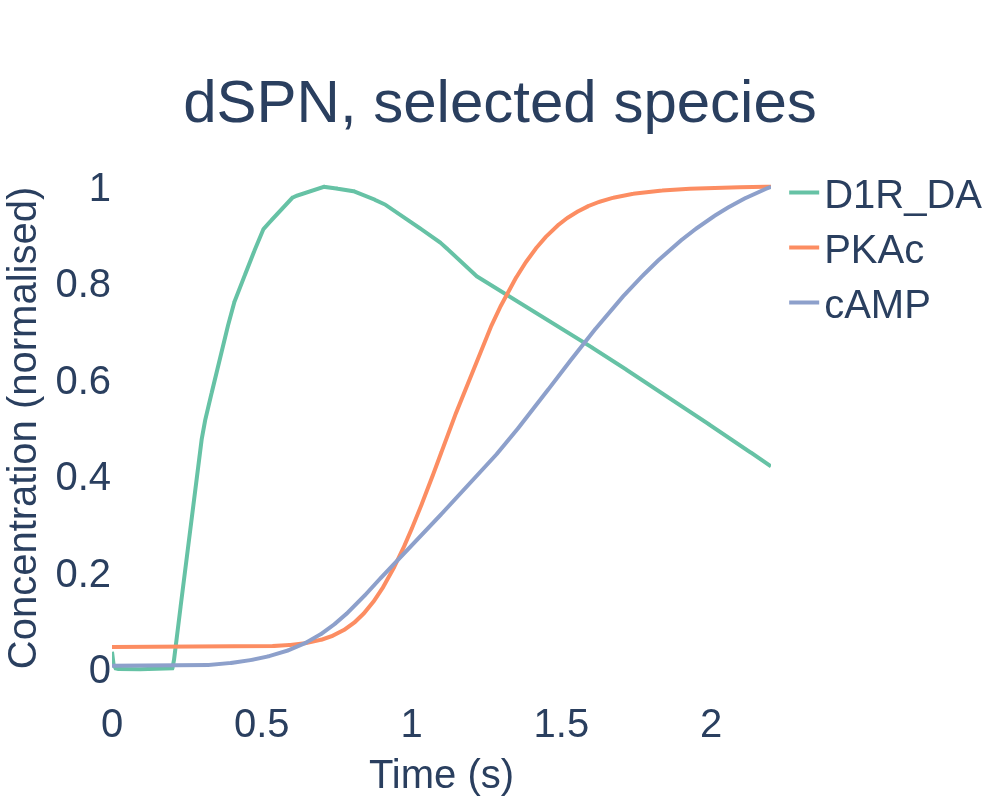

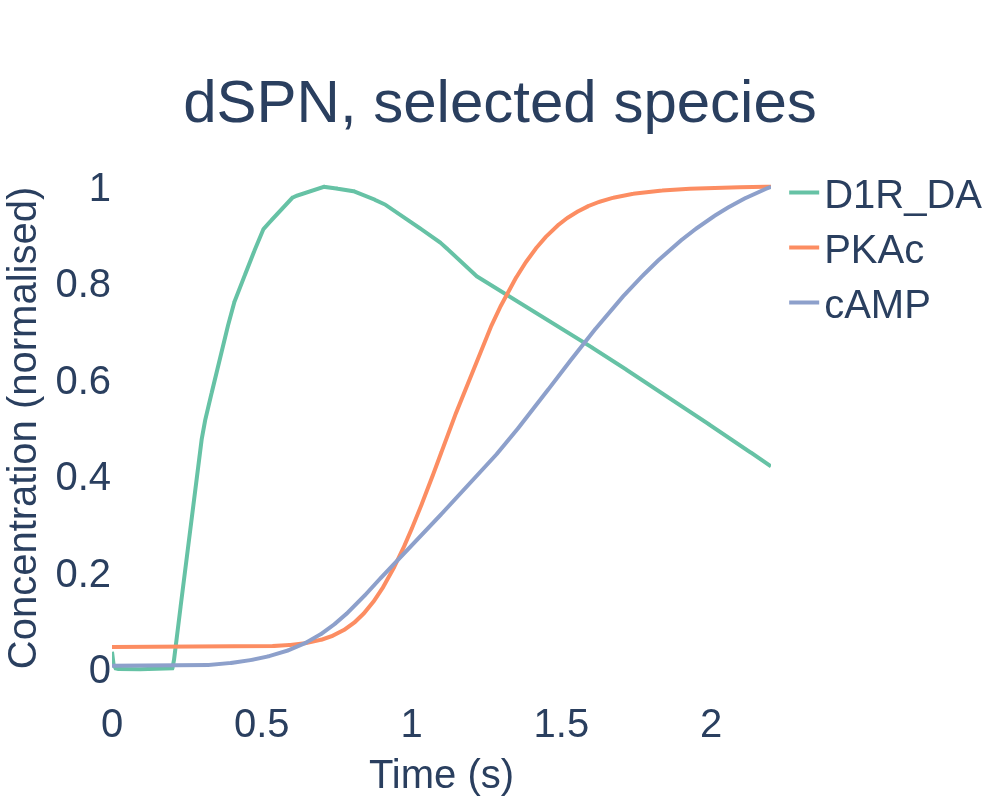

In [7]:
prd.plot(neuron_id=0, species=["D1R_DA", "PKAc", "cAMP"], fig_name="biochem-0-normalised_DA_20Hz.svg", title="dSPN, selected species", normalise=True)

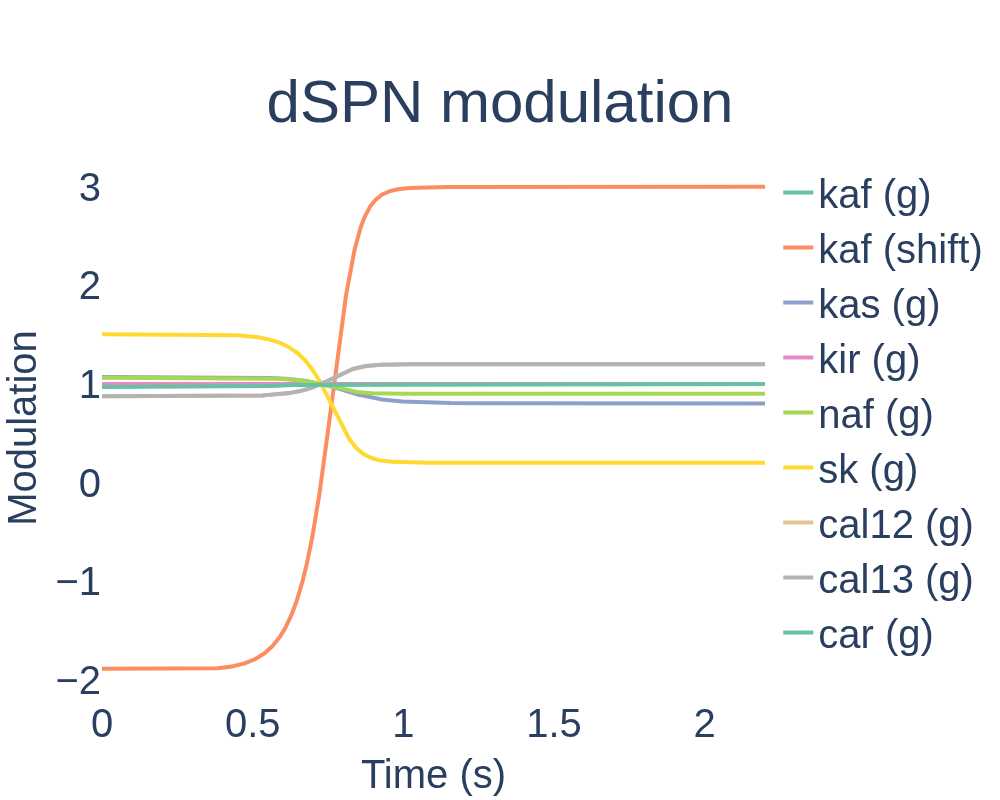

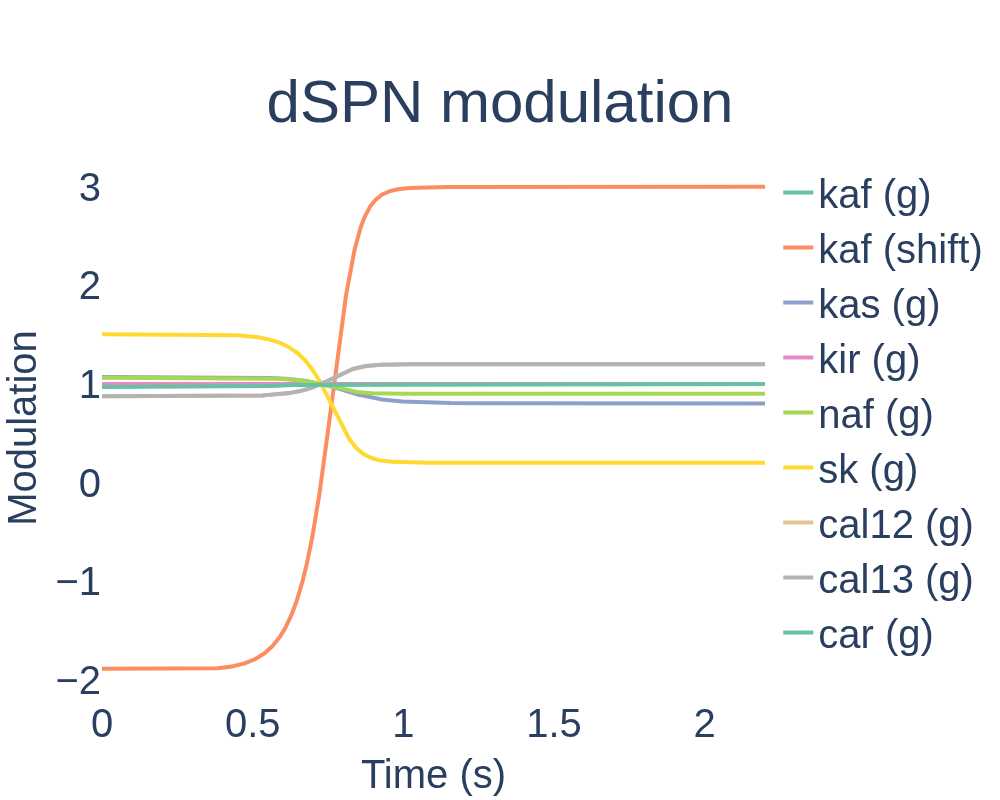

In [8]:
prd.plot(neuron_id=0, 
         species=['kaf_ms.modulation_factor_g', 'kaf_ms.modulation_factor_shift', 'kas_ms.modulation_factor', 'kir_ms.modulation_factor', 'naf_ms.modulation_factor',
                 'sk_ms.modulation_factor', 'cal12_ms.modulation_factor', 'cal13_ms.modulation_factor', 'car_ms.modulation_factor'], 
         species_label=['kaf (g)', 'kaf (shift)', 'kas (g)', 'kir (g)', 'naf (g)', 'sk (g)', 'cal12 (g)', 'cal13 (g)', 'car (g)'],
         ylabel="Modulation", fig_name="modulation-0_DA_20Hz.svg", title="dSPN modulation", width=800, height=700)

# Spike frequency

In [16]:
from snudda.utils import SnuddaLoadSimulation

nd_on4 = SnuddaLoadSimulation(sim_output_neuromodulation_ON4)
data_types = nd_on4.list_data_types(0)
all_species_data = nd_on4.get_all_data(neuron_id=0, exclude=["spikes", "voltage"])
time_on4 = nd_on4.get_time()
voltage_on4 = nd_on4.get_data("voltage")

nd_on20 = SnuddaLoadSimulation(sim_output_neuromodulation_ON20)
data_types = nd_on20.list_data_types(0)
all_species_data = nd_on20.get_all_data(neuron_id=0, exclude=["spikes", "voltage"])
time_on20 = nd_on20.get_time()
voltage_on20 = nd_on20.get_data("voltage")

nd_off = SnuddaLoadSimulation(sim_output_neuromodulation_OFF)
time_off = nd_off.get_time()
voltage_off = nd_off.get_data("voltage")

Loading networks/bevan_fig1g_bath_current_short/simulation/output_neuromodulation_ON_4Hz.hdf5
Loading networks/bevan_fig1g_bath_current_short/simulation/output_neuromodulation_ON_20Hz.hdf5
Loading networks/bevan_fig1g_bath_current_short/simulation/output_neuromodulation_OFF.hdf5


In [17]:
import numpy as np
import json

with open(sim_config_on4, "r") as f:
    config4 = json.load(f)

da_time4 = np.array(config4["bath_application"]["DA"]["time"])
da_conc4 = np.array(config4["bath_application"]["DA"]["concentration"]) * 1e6

with open(sim_config_on20, "r") as f:
    config20 = json.load(f)

da_time20 = np.array(config20["bath_application"]["DA"]["time"])
da_conc20 = np.array(config20["bath_application"]["DA"]["concentration"]) * 1e6


Figure saved successfully!


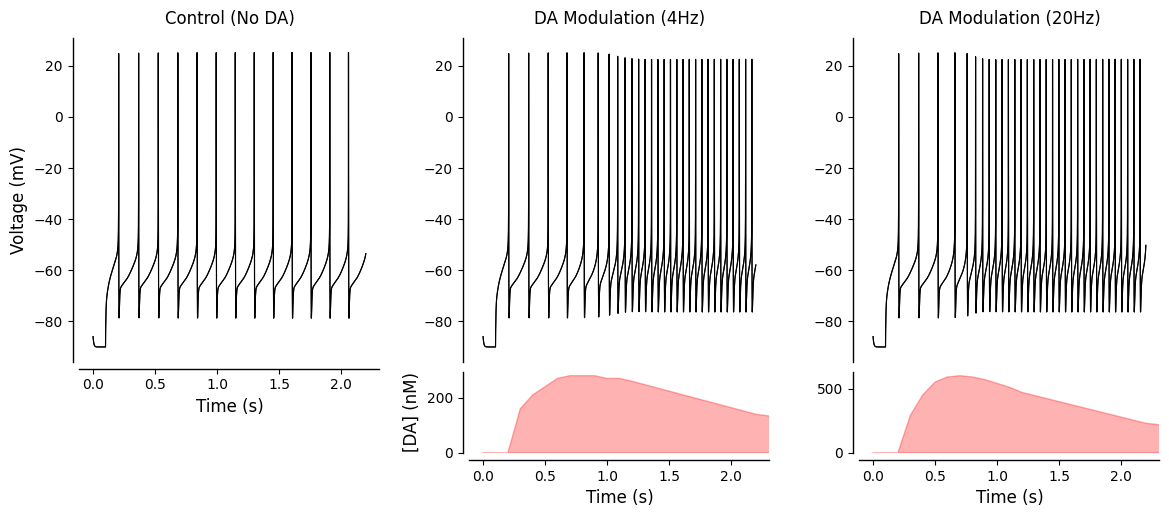

In [20]:
import matplotlib.pyplot as plt
import numpy as np

plot_id = 0

# Set publication-ready parameters
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.linewidth'] = 1.0

# Create figure with custom gridspec for subpanels
fig = plt.figure(figsize=(12, 5))
gs = fig.add_gridspec(2, 3, height_ratios=[4, 1], hspace=0.05, wspace=0.3,
                      left=0.08, right=0.98, top=0.95, bottom=0.12)

# Create main voltage panels
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

# Create dopamine concentration subpanels (only under panels 2 and 3)
ax2_sub = fig.add_subplot(gs[1, 1])
ax3_sub = fig.add_subplot(gs[1, 2])

# Plot voltage traces
ax1.plot(time_off, voltage_off[0][plot_id]*1e3, 'k', linewidth=0.8)
ax2.plot(time_on4, voltage_on4[0][plot_id]*1e3, 'k', linewidth=0.8)
ax3.plot(time_on20, voltage_on20[0][plot_id]*1e3, 'k', linewidth=0.8)

# Plot dopamine concentrations
# ax2_sub.plot(da_time4, da_conc4, linewidth=0, color='#FFA5A5', alpha=0.3)
#ax3_sub.plot(da_time20, da_conc20, linewidth=0, color='#FFA5A5', alpha=0.3)

ax2_sub.fill_between(da_time4, 0, da_conc4, color='#FF0000', alpha=0.3)
ax3_sub.fill_between(da_time20, 0, da_conc20, color='#FF0000', alpha=0.3)

# Truncate subplots to match voltage plot x-axis
ax2_sub.set_xlim(ax2.get_xlim())
ax3_sub.set_xlim(ax3.get_xlim())

# Fix axes
ax2.sharey(ax1)
ax3.sharey(ax1)

ax2_sub.sharex(ax2)
ax3_sub.sharex(ax3)

# Set labels for voltage panels
ax1.set_ylabel('Voltage (mV)', fontsize=12)
ax1.set_xlabel('Time (s)', fontsize=12)
# ax2.set_xlabel('Time (ms)', fontsize=11)
# ax3.set_xlabel('Time (ms)', fontsize=11)

# Set labels for DA subpanels
ax2_sub.set_ylabel('[DA] (nM)', fontsize=12)
ax2_sub.set_xlabel('Time (s)', fontsize=12)
ax3_sub.set_xlabel('Time (s)', fontsize=12)

# Add panel labels
# ax1.text(-0.15, 1.05, 'A', transform=ax1.transAxes, fontsize=24)
# ax2.text(-0.15, 1.05, 'B', transform=ax2.transAxes, fontsize=24)
# ax3.text(-0.15, 1.05, 'C', transform=ax3.transAxes, fontsize=24)

# Add titles
ax1.set_title('Control (No DA)', fontsize=12, pad=10)
ax2.set_title('DA Modulation (4Hz)', fontsize=12, pad=10)
ax3.set_title('DA Modulation (20Hz)', fontsize=12, pad=10)

# Remove top and right spines for all panels
for ax in [ax1, ax2, ax3, ax2_sub, ax3_sub]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='both', which='major', labelsize=10)

ax2.spines["bottom"].set_visible(False)
ax3.spines["bottom"].set_visible(False)
ax2.tick_params(bottom=False) 
ax3.tick_params(bottom=False)

# Remove y-labels for panels 2 and 3 (voltage) to avoid redundancy
ax2.set_ylabel('')
ax3.set_ylabel('')

# Remove y-label for panel 3 DA subpanel
ax3_sub.set_ylabel('')

# Align x-axes for voltage and DA subpanels
ax2.sharex(ax2_sub)
ax3.sharex(ax3_sub)

# Remove x-tick labels from voltage panels that have DA subpanels below
# ax2.set_xticklabels([])
# ax3.set_xticklabels([])
# ax2.set_xlabel('')
# ax3.set_xlabel('')

# Adjust DA subpanel appearance
for ax_sub in [ax2_sub, ax3_sub]:
    ax_sub.set_ylim(bottom=0)
    ax_sub.spines['left'].set_position(('outward', 5))
    ax_sub.spines['bottom'].set_position(('outward', 5))

# Adjust main panel appearance
for ax in [ax1, ax2, ax3]:
    ax.spines['left'].set_position(('outward', 5))
    ax.spines['bottom'].set_position(('outward', 5))

plt.savefig('figures/replicating_bevan_fig1g.png', dpi=300, bbox_inches='tight')
plt.savefig('figures/replicating_bevan_fig1g.pdf', bbox_inches='tight')
print("Figure saved successfully!")
plt.show()
plt.close()

# Plot frequency change plots

In [10]:
from snudda.plotting import SnuddaPlotSpikeRaster2

network_file = os.path.join(network_path, "network-synapses.hdf5")
spr_on4 = SnuddaPlotSpikeRaster2(network_path=network_path, network_file=network_file, simulation_file=sim_output_neuromodulation_ON4)

network_file = os.path.join(network_path, "network-synapses.hdf5")
spr_on20 = SnuddaPlotSpikeRaster2(network_path=network_path, network_file=network_file, simulation_file=sim_output_neuromodulation_ON20)

network_file = os.path.join(network_path, "network-synapses.hdf5")
spr_off = SnuddaPlotSpikeRaster2(network_path=network_path, network_file=network_file, simulation_file=sim_output_neuromodulation_OFF)

time_ranges = [(0.5, 2)]  # For short version, only one time range
neuron_id_all = [0, 1, 2, 3, 4]
freq_on4 = spr_on4.snudda_simulation_load.get_frequency(neuron_id=neuron_id_all, time_ranges=time_ranges)
freq_on20 = spr_on20.snudda_simulation_load.get_frequency(neuron_id=neuron_id_all, time_ranges=time_ranges)
freq_off = spr_off.snudda_simulation_load.get_frequency(neuron_id=neuron_id_all, time_ranges=time_ranges)



Loading networks/bevan_fig1g_bath_current_short/simulation/output_neuromodulation_ON_4Hz.hdf5
Loading networks/bevan_fig1g_bath_current_short/simulation/output_neuromodulation_ON_20Hz.hdf5
Loading networks/bevan_fig1g_bath_current_short/simulation/output_neuromodulation_OFF.hdf5


In [11]:
freq_on4, freq_on20, freq_off

(array([[15.33333333],
        [13.33333333],
        [16.        ],
        [18.        ],
        [18.66666667]]),
 array([[17.33333333],
        [15.33333333],
        [18.66666667],
        [21.33333333],
        [22.66666667]]),
 array([[6.66666667],
        [6.        ],
        [5.33333333],
        [6.        ],
        [5.33333333]]))

Frequency comparison figure saved successfully!


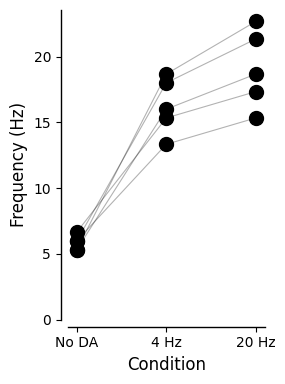

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Set publication-ready parameters
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.linewidth'] = 1.0

# Create figure
fig, ax = plt.subplots(figsize=(3, 4))

# X-axis positions for the three conditions
x_positions = [0, 1, 2]
x_labels = ['No DA', '4 Hz', '20 Hz']

# Extract frequencies (flatten the arrays since they have shape (n, 1))
freq_off_flat = freq_off.flatten()
freq_on4_flat = freq_on4.flatten()
freq_on20_flat = freq_on20.flatten()

# Number of neurons
n_neurons = len(freq_off_flat)

# Plot each neuron's trajectory
for i in range(n_neurons):
    frequencies = [freq_off_flat[i], freq_on4_flat[i], freq_on20_flat[i]]
    
    # Plot line connecting the three points
    ax.plot(x_positions, frequencies, 'k-', linewidth=0.8, alpha=0.3)
    
    # Plot dots at each position
    ax.plot(x_positions, frequencies, 'ko', markersize=10, markerfacecolor='k')

# Set labels and formatting
ax.set_ylabel('Frequency (Hz)', fontsize=12)
ax.set_xlabel('Condition', fontsize=12)
ax.set_xticks(x_positions)
ax.set_xticklabels(x_labels, fontsize=12)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position(('outward', 5))
ax.spines['bottom'].set_position(('outward', 5))

# Set tick parameters
ax.tick_params(axis='both', which='major', labelsize=10)

# Set y-axis to start from 0 or a reasonable minimum
ax.set_ylim(bottom=0)

# Adjust layout
plt.tight_layout()

# Save figure
plt.savefig('figures/frequency_comparison.png', dpi=300, bbox_inches='tight')
plt.savefig('figures/frequency_comparison.pdf', bbox_inches='tight')
print("Frequency comparison figure saved successfully!")

plt.show()
plt.close()

In [ ]:
def make_freq_plot(data, title):
    fig = go.Figure()

    # Add one line per row
    for row in data:
        fig.add_trace(go.Scatter(
            x=[0, 1],
            y=row,
            mode='lines+markers',
            line=dict(color='gray', width=2),
            marker=dict(size=10, color='black'),
            showlegend=False
        ))

    # Mean line
    mean_vals = np.mean(data, axis=0)
    fig.add_trace(go.Scatter(
        x=[0, 1],
        y=mean_vals,
        mode='lines+markers',
        line=dict(color='black', width=6),
        marker=dict(size=20, color='black'),
        name='Mean'
    ))

    # Layout (new format)
    fig.update_layout(
        title=dict(
            text=title,
            font=dict(size=40)   # bigger title font if you like
        ),
        xaxis=dict(
            tickmode='array',
            tickvals=[0, 1],
            ticktext=["t=(1,2)", "t=(6,7)"],
            title=dict(text="", font=dict(size=20)),
            tickfont=dict(size=30)
        ),
        yaxis=dict(
            title=dict(text="Frequency (Hz)", font=dict(size=40)),
            tickfont=dict(size=30)
        ),
        width=400,
        height=500,
        font=dict(size=16),
        legend=dict(
            font=dict(size=30)   # adjust as needed
        )
    )
    return fig


In [ ]:
# Create and show plots
fig_on = make_freq_plot(freq_on4, "With Dopamine (4Hz)")
fig_on.show()
fig_on.write_image("fig1_frequency_change_with_da_4hz.pdf", scale=2)
fig_on.write_image("fig1_frequency_change_with_da_4hz.png", scale=2)
#fig_on.write_image("fig1_frequency_change_with_da.pdf", scale=2)

In [ ]:
# Create and show plots
fig_on = make_freq_plot(freq_on20, "With Dopamine (20Hz)")
fig_on.show()
fig_on.write_image("fig1_frequency_change_with_da_20hz.pdf", scale=2)
fig_on.write_image("fig1_frequency_change_with_da_20hz.png", scale=2)
#fig_on.write_image("fig1_frequency_change_with_da.pdf", scale=2)

In [ ]:
fig_off = make_freq_plot(freq_off, "Without Dopamine")
fig_off.show()
fig_off.write_image("fig1_frequency_change_no_da.pdf", scale=2)
fig_off.write_image("fig1_frequency_change_no_da.png", scale=2)
#fig_off.write_image("fig1_frequency_change_no_da.pdf", scale=2)

## Experiment 2

Can we show persistence for 15 minutes? (Compare Figure 2)

## Experiment 3

Current injection for 3 seconds, trigger 2 (4) spikes in dSPN. After DA application (1 second, 0.5u M) spikes come earlier and at a higher frequency.

Compare Figure 4 B, C, D

## Experiment 4

Subthreshold current injection (<10 mV depolarisation). Size of depolarisation not affected by DA.

Suprathreshold current injection, with DA lower threshold, and faster spiking.

Compare Figure 5

In [ ]:
Experiment 5

Compare Figure 6